# Import necessary libraries to conduct T-test and prepare data visualizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Need to read in the Master list of Mid laners and further filter out for the Assassin cluster of champions from my mid lane cluster notebook

In [2]:
df = pd.read_csv('Mid_lane.csv')
df.drop(columns=['Unnamed: 0', 'Lane', 'Item_0', 'Item_1', 'Item_2', 'Item_3', 'Item_4', 'Item_5', 'Item_6'], inplace = True)

In [3]:
df.columns

Index(['Summoner', 'Champion', 'Kills', 'Deaths', 'Assists', 'Killing_Spree',
       'Multikills', 'Total_Damage', 'Damage_To_Objectives',
       'Damage_To_Turrets', 'Damage_Taken', 'Gold_Earned', 'Champ_Level',
       'Wards_Bought', 'Vision_Score', 'Crowd_Controls', 'champion_name'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20949 entries, 0 to 20948
Data columns (total 17 columns):
Summoner                20949 non-null object
Champion                20949 non-null int64
Kills                   20949 non-null int64
Deaths                  20949 non-null int64
Assists                 20949 non-null int64
Killing_Spree           20949 non-null int64
Multikills              20949 non-null int64
Total_Damage            20949 non-null int64
Damage_To_Objectives    20949 non-null int64
Damage_To_Turrets       20949 non-null int64
Damage_Taken            20949 non-null int64
Gold_Earned             20949 non-null int64
Champ_Level             20949 non-null int64
Wards_Bought            20949 non-null int64
Vision_Score            20949 non-null int64
Crowd_Controls          20949 non-null int64
champion_name           20949 non-null object
dtypes: int64(15), object(2)
memory usage: 2.7+ MB


In [5]:
assassins = df[df['champion_name'].isin(['Leblanc', 'Ryze', 'Anivia', 'Kassadin', 'Corki', 'Katarina', 'Cassiopeia',
                                        'Akali', 'Talon', 'AurelionSol', 'Yasuo', 'Zed', 'Ekko', 'Qiyana'])]

In [6]:
assassins

,Summoner,Champion,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,Damage_To_Turrets,Damage_Taken,Gold_Earned,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls,champion_name
1,pABgmovHF4o0fkvV07C0tyAMO4ohie9lgkV3kNymHXscIS...,13,4,3,8,2,2,13014,7945,1234,11345,9202,13,2,15,12,Ryze
3,CdvbZGOaUL2ZdkQ2q_sN7Dfj6U-j43AIvQNMfgxYz5E26X...,42,4,6,3,3,2,21081,4272,1272,20363,11497,15,4,25,0,Corki
4,dBRVgXQf7y-HECfH7u5uhFgocl8ELZvnFa6JuMhoTgngAA,136,3,2,2,2,1,5804,0,0,11131,7530,11,2,7,10,AurelionSol
5,bGr31kb_bZi6epNGn9CZBEfwp9mogrErxiHrxEc_5yA5FQ,246,12,5,12,7,2,32448,4715,1737,30904,13827,16,2,13,16,Qiyana
10,DYW6XWP6IDd_l2PMF4Q82Vw88IzkMdHFRUUQdzBFKiDCny...,84,7,6,5,3,2,18310,5451,3725,33515,14925,17,4,39,9,Akali
11,qhAkDI2T8Uf8oiUDQO0xBvxOB-mFcBH49IzENoj4tsFbFg,91,5,6,8,2,1,18020,11806,3168,22710,11861,15,2,27,4,Talon
14,_sVU2gU9ULAv4tmUkIs1uTDHP0y_AWDEyQNotrOYrXjmPz0,238,9,3,7,4,1,12584,4906,4906,9224,10863,13,2,15,2,Zed
15,khp9X8OZk3kLykpnBVTn0VonpHd9C_CrEpcqdS_b68qEims,84,2,12,6,0,1,11787,0,0,22538,5873,11,1,13,5,Akali
17,lTqXDsRx61HN2yfvlMI2q4MX8tiv1acDwkqs8sTSBP3nyg,246,7,4,3,3,1,13424,3582,1449,17361,9070,13,1,6,18,Qiyana
18,27t5KxsERhNRPBIMQebXUlpwqkiLsdAl9riOulxrzNAjzA,38,10,3,5,8,3,25147,9570,5903,24222,13112,16,2,24,24,Kassadin


# In order to run a T-Test, I need to consolidate these columns into a single numerical score to effectively compare these champions. Since they are all in the same cluster, it is fair to judge all of them based on the same criteria. My final numerical score is based on the following:

Kills (Higher the better)

Deaths (Lower the better)

Assists (You want assists to be low because you want the kills)

Damage (Higher the better)

Damage to Objectives and Towers (Higher the better, but not weighed as much since objective of assassin is damage)

Damage Taken (Lower the better)

Gold Earned (Higher the better)

Vision Score (They should be clearing vision to get picks so higher the better)

Crowd Control (Different champions have different tools so higher the better)

To scale the values to a similar scale, I get the average score of each column and obtain the percentage of the value against the average and then weigh each column based on my understanding of the role of assassins

In [7]:
# Some games end up as remakes - which is when one player disconnected and the game ends at 3 minutes. 
# I am going to filter these games out by filtering out the damage when it is below 1000 
# because that is very easy to attain.
assassins = assassins.query('Total_Damage > 1000')

In [8]:
assassins['Score'] = ((1.25 * (assassins['Kills'].map(lambda x: (x - assassins.Kills.mean())/assassins.Kills.mean()+1))) -
                      (1.25 * assassins['Deaths'].map(lambda x: (x - assassins.Deaths.mean())/assassins.Deaths.mean()+1)) +
                      (.5 * assassins['Assists'].map(lambda x: (x - assassins.Assists.mean())/assassins.Assists.mean()+1)) +
                      assassins['Killing_Spree'].map(lambda x: (x - assassins.Killing_Spree.mean())/assassins.Killing_Spree.mean()+1) +
                      assassins['Total_Damage'].map(lambda x: (x - assassins.Total_Damage.mean())/assassins.Total_Damage.mean()+1) +
                      (.6* assassins['Damage_To_Objectives'].map(lambda x: (x - assassins.Damage_To_Objectives.mean())/assassins.Damage_To_Objectives.mean()+1)) +
                      (.6* assassins['Damage_To_Turrets'].map(lambda x: (x - assassins.Damage_To_Turrets.mean())/assassins.Damage_To_Turrets.mean()+1)) -
                      assassins['Damage_Taken'].map(lambda x: (x - assassins.Damage_Taken.mean())/assassins.Damage_Taken.mean()+1) +
                      (.6* assassins['Gold_Earned'].map(lambda x: (x - assassins.Gold_Earned.mean())/assassins.Gold_Earned.mean()+1)) +
                      (.8* assassins['Vision_Score'].map(lambda x: (x - assassins.Vision_Score.mean())/assassins.Vision_Score.mean()+1)) +
                      (.75* assassins['Crowd_Controls'].map(lambda x: (x - assassins.Crowd_Controls.mean())/assassins.Crowd_Controls.mean()+1)))
                      
                      

/Users/hiowatah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [9]:
assassins.head()

,Summoner,Champion,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,Damage_To_Turrets,Damage_Taken,Gold_Earned,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls,champion_name,Score
1,pABgmovHF4o0fkvV07C0tyAMO4ohie9lgkV3kNymHXscIS...,13,4,3,8,2,2,13014,7945,1234,11345,9202,13,2,15,12,Ryze,4.643217
3,CdvbZGOaUL2ZdkQ2q_sN7Dfj6U-j43AIvQNMfgxYz5E26X...,42,4,6,3,3,2,21081,4272,1272,20363,11497,15,4,25,0,Corki,3.249118
4,dBRVgXQf7y-HECfH7u5uhFgocl8ELZvnFa6JuMhoTgngAA,136,3,2,2,2,1,5804,0,0,11131,7530,11,2,7,10,AurelionSol,2.059604
5,bGr31kb_bZi6epNGn9CZBEfwp9mogrErxiHrxEc_5yA5FQ,246,12,5,12,7,2,32448,4715,1737,30904,13827,16,2,13,16,Qiyana,8.152343
10,DYW6XWP6IDd_l2PMF4Q82Vw88IzkMdHFRUUQdzBFKiDCny...,84,7,6,5,3,2,18310,5451,3725,33515,14925,17,4,39,9,Akali,5.205556


Text(0, 0.5, 'Number of Games')

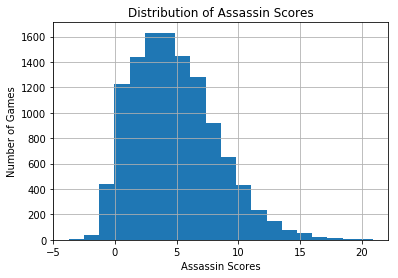

In [10]:
assassins.Score.hist(bins=20)
plt.title('Distribution of Assassin Scores')
plt.xlabel('Assassin Scores')
plt.ylabel('Number of Games')

In [11]:
assassins.groupby('champion_name').mean().Score

champion_name
Akali          3.946143
Anivia         5.801690
AurelionSol    4.990778
Cassiopeia     5.467469
Corki          5.181612
Ekko           5.250538
Kassadin       5.278941
Katarina       4.170069
Leblanc        4.758752
Qiyana         4.989884
Ryze           4.940481
Talon          4.520723
Yasuo          4.967289
Zed            5.159345
Name: Score, dtype: float64

Text(0.5, 0, 'Champions')

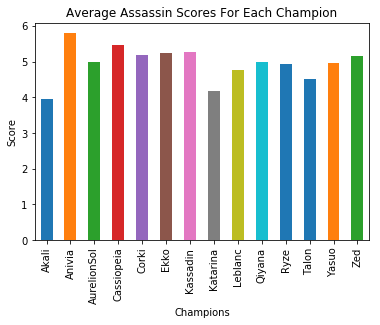

In [12]:
assassins.groupby('champion_name').mean().Score.plot(kind = 'bar')
plt.title('Average Assassin Scores For Each Champion')
plt.ylabel('Score')
plt.xlabel('Champions')

Text(0, 0.5, 'Count of Score')

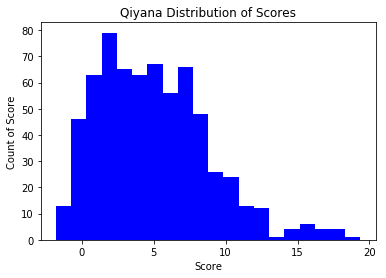

In [13]:
assassins[assassins['champion_name'] == 'Qiyana'].Score.hist(color = 'blue', bins = 20, grid = False)
plt.title('Qiyana Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count of Score')

Text(0, 0.5, 'Count of Score')

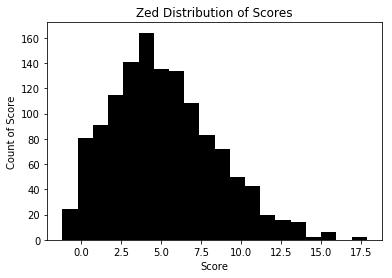

In [14]:
assassins[assassins['champion_name'] == 'Zed'].Score.hist(color = 'black', bins = 20, grid = False)
plt.title('Zed Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count of Score')

Text(0, 0.5, 'Count of Score')

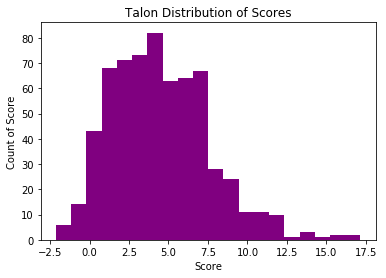

In [15]:
assassins[assassins['champion_name'] == 'Talon'].Score.hist(color = 'purple', bins = 20, grid = False)
plt.title('Talon Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count of Score')

Text(0, 0.5, 'Count of Score')

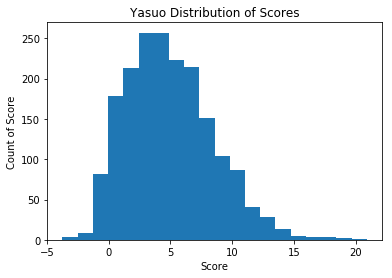

In [16]:
assassins[assassins['champion_name'] == 'Yasuo'].Score.hist(bins = 20, grid = False)
plt.title('Yasuo Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count of Score')

# Looking closer at the melee attack damage assassin/damage dealers within this cluster, I want to determine if Qiyana is the best out of them.

In [17]:
assassins[assassins['champion_name'].isin(['Talon', 'Yasuo', 'Zed', 'Qiyana'])].groupby('champion_name').mean().Score

champion_name
Qiyana    4.989884
Talon     4.520723
Yasuo     4.967289
Zed       5.159345
Name: Score, dtype: float64

In [18]:
assassins[assassins['champion_name'].isin(['Talon', 'Yasuo', 'Zed', 'Qiyana'])].groupby('champion_name').std().Score

champion_name
Qiyana    3.838586
Talon     3.132475
Yasuo     3.516731
Zed       3.297191
Name: Score, dtype: float64

In [19]:
assassins[assassins['champion_name'].isin(['Talon', 'Yasuo', 'Zed', 'Qiyana'])].groupby('champion_name').median().Score

champion_name
Qiyana    4.569857
Talon     4.244707
Yasuo     4.578966
Zed       4.761983
Name: Score, dtype: float64

In [20]:
# Import the necessary library to run my t-tests
from scipy import stats

## Measures of Kurtosis and Skewness

In [45]:
print(" Yasuo Kurtosis: {}\n".format(stats.kurtosis(assassins[assassins['champion_name'] == 'Yasuo'].Score)),
"Talon Kurtosis: {}\n".format(stats.kurtosis(assassins[assassins['champion_name'] == 'Talon'].Score)),
"Zed Kurtosis: {}\n".format(stats.kurtosis(assassins[assassins['champion_name'] == 'Zed'].Score)),
"Qiyana Kurtosis: {}".format(stats.kurtosis(assassins[assassins['champion_name'] == 'Qiyana'].Score)))

 Yasuo Kurtosis: 0.4127446047955603
 Talon Kurtosis: 0.8115442475553993
 Zed Kurtosis: 0.07734699714328608
 Qiyana Kurtosis: 0.6057514341449037


In [44]:
print(" Yasuo Skewness: {}\n".format(stats.skew(assassins[assassins['champion_name'] == 'Yasuo'].Score)),
"Talon Skewness: {}\n".format(stats.skew(assassins[assassins['champion_name'] == 'Talon'].Score)),
"Zed Skewness: {}\n".format(stats.skew(assassins[assassins['champion_name'] == 'Zed'].Score)),
"Qiyana Skewness: {}".format(stats.skew(assassins[assassins['champion_name'] == 'Qiyana'].Score)))

 Yasuo Skewness: 0.6371148296252727
 Talon Skewness: 0.6982561352234362
 Zed Skewness: 0.5702550427228119
 Qiyana Skewness: 0.777360173850756


In [51]:
stats.ttest_ind(assassins[assassins['champion_name'] == 'Qiyana'].Score, 
                assassins[assassins['champion_name'] == 'Talon'].Score)

Ttest_indResult(statistic=2.415501769347891, pvalue=0.01585042642123271)